In [1]:
!python -m pip install git+https://github.com/huggingface/transformers

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-fm87lefw
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-fm87lefw
  Resolved https://github.com/huggingface/transformers to commit a06a0d12636756352494b99b5b264ac9955bc735
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for huggingface-hub<1.0,>=0.23.2 from https://files.pythonhosted.org/packages/60/bf/cea0b9720c32fa01b0c4ec4b16b9f4ae34ca106b202ebbae9f03ab98cd8f/huggingface_hub-0.26.2-py3-none-any.whl.metadata
  Obtaining dependency information for regex!=2019.12.17 from https://files.pythonhosted.org/packages/f2/98/26d3830875b53071f1f0ae6d547f1d98e964dd29ad35cbf94439120bb67a/regex-2024.11.6-cp310-cp310-manylinux_2_17_x8

In [2]:
pip install sentencepiece

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Obtaining dependency information for sentencepiece from https://files.pythonhosted.org/packages/a6/27/33019685023221ca8ed98e8ceb7ae5e166032686fa3662c68f1f1edf334e/sentencepiece-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install 'accelerate>=0.26.0'

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Obtaining dependency information for accelerate>=0.26.0 from https://files.pythonhosted.org/packages/d1/d5/0050b2820a1e709ffa623f9a9e8ae42d0903535f2150613cbfeb7f16932a/accelerate-1.1.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 6.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


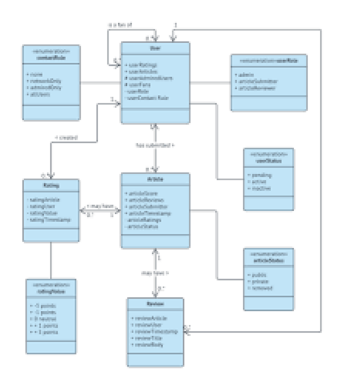


Processed Output (cleaned and entity-extracted):
What is shown in this image? The image shows a flowchart that illustrates the process of creating a new project. It starts with a header that reads "Create a New Project." The flowchart then shows a series of boxes that represent the steps involved in creating a project. These boxes include "Create Project," "Create Task," "Initiate Project," and "Create Workspace." The "Create" box is highlighted, indicating that it is the first step in the process. The "Initiate" box indicates that the user is creating a task, and the "Create," "Task," and ""Create WorkSpace" boxes are labeled. The final step in this process is the "Integrate Project" box, which is highlighted.


In [4]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq

# Step 1: Load the model and processor from Hugging Face
model = AutoModelForVision2Seq.from_pretrained("microsoft/kosmos-2-patch14-224")
processor = AutoProcessor.from_pretrained("microsoft/kosmos-2-patch14-224")

# Step 2: Define the text and image prompt in the LLaVA 1.6 style
conversation = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What is shown in this image?"},
            {"type": "image"}
        ]
    }
]

# Step 3: Load the image from a local path (replace "local_image.jpg" with your image file)
image_path = "11.png"  # Replace with the path to your local image
image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")  # Hide the axes
plt.show()
# Step 4: Save the image and reload it (optional step to replicate original Kosmos-2 demo behavior)

# Step 5: Prepare inputs for the model by processing the image and text prompt
# Manually creating a chat template for the conversation
chat_template = [
    {"role": "user", "content": [{"type": "text", "text": "What is shown in this image?"}, {"type": "image"}]}
]

# Process the conversation and image using the processor
inputs = processor(text=conversation[0]["content"][0]["text"], images=image, return_tensors="pt")

# Step 6: Generate the output based on the image and prompt
generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=150,
)

# Step 7: Decode the generated text output
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Step 8: Process the generated text (without cleanup and entity extraction)
processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)

# Step 9: Print the raw generated output

# Step 10: Process the generated text with entity extraction (default behavior)
processed_text, entities = processor.post_process_generation(generated_text)

# Step 11: Print the final cleaned output and the extracted entities
print("\nProcessed Output (cleaned and entity-extracted):")
print(processed_text)



# Step 12: Display the image
